# - Barcelona Pass Data -

## 1. Import packages

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
from PIL import Image
import matplotlib.patches as mpatches
# from pywaffle import Waffle

## 2. Read & Merge Data

In [377]:
team = 'barcelona'

df = pd.read_csv(f'/work/assets/{team}/{team}_ptype.csv')
df2 = pd.read_csv(f'/work/assets/{team}/{team}_pass.csv')
df3 = pd.read_csv(f'/work/assets/{team}/{team}_attack.csv')
df3 = df3.rename(columns={'player':'Player'})

df = df.rename(columns={'player':'Player'})
df_pass = df2.merge(df, how='outer', on='Player')
df_pass = df_pass.merge(df3, how='outer', on='Player')

df_pass.head()
df3


,Player,sca,sca90,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,gca90,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def
0,Frenkie de Jong,17,1.91,16,0,0,0,1,0,2,0.23,2,0,0,0,0,0
1,Lionel Messi,59,6.94,34,4,14,1,6,0,6,0.71,3,0,2,1,0,0
2,Jordi Alba,16,2.12,16,0,0,0,0,0,3,0.40,3,0,0,0,0,0
3,Antoine Griezmann,14,2.07,13,0,1,0,0,0,2,0.30,2,0,0,0,0,0
4,Clément Lenglet,6,0.90,5,0,0,0,0,1,2,0.30,2,0,0,0,0,0
5,Gerard Piqué,2,0.26,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0
6,Sergio Busquets,14,2.09,11,1,0,0,2,0,0,0.00,0,0,0,0,0,0
7,Sergi Roberto,13,1.87,12,0,0,0,0,1,2,0.29,2,0,0,0,0,0
8,Neto,1,0.17,1,0,0,0,0,0,0,0.00,0,0,0,0,0,0
9,Philippe Coutinho,10,2.11,6,0,1,1,2,0,3,0.63,3,0,0,0,0,0


## 3. Settings Club-Logo On Background

In [378]:
# convert()
# -L -> グレースケール
# -LA -> アルファ値を考慮したグレースケール
# HSV -> hue(色相) Saturation(彩度) Value(明度)
# point()
# - lambda x: x * 1.5 (1.5倍の明るさにする)
# - lambda x: x * 0.5 (0.5倍の明るさにする)

# セピア化
# - gray = img.convert('L')
# Image.merge('RGB',(
#                     gray.point(lambda x: x * 240/ 255),
#                     gray.point(lambda x: x * 200 / 255),
#                     gray.point(lambda x: x * 145 / 255)
# ))

# ガンマ変換
# - def gamma_table(gamma_r, gamma_g, gamma_b, gain_r=1.0, gain_g=1.0, gain_b=1.0):
#     r_tbl = [min(255, int((x / 255.) ** (1. / gamma_r) * gain_r * 255.)) for x in range(256)]
#     g_tbl = [min(255, int((x / 255.) ** (1. / gamma_g) * gain_g * 255.)) for x in range(256)]
#     b_tbl = [min(255, int((x / 255.) ** (1. / gamma_b) * gain_b * 255.)) for x in range(256)]
#     return r_tbl + g_tbl + b_tbl
# img.point(gamma_table(1.2, 0.5, 0.5))

# getbbox
# - 画像内で値が０でない最小領域を返す。値が全て０ならばNoneを返す
# alpha = Image.open("alpha.png")
# crop = alpha.split()[-1].getbbox()
# alpha.crop(crop)

# resize
# - img.resize((128, 128), Image.LANCZOS)

# 参考URL（https://qiita.com/pashango2/items/145d858eff3c505c100a）

img = Image.open('/work/assets/image/barca.png').convert('L')
logo = img.copy()
logo.putalpha(60)
df_pass

,Player,Position,Minute90,Attempt,Completed,Sucpct,Totaldist,Progdist,LongPass,LongComp,...,s_fld,s_def,gca,gca90,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def
0,Frenkie de Jong,"MF,DF",9.9,690,620,89.9,10671,3197,77,65,...,1,0,2,0.23,2,0,0,0,0,0
1,Lionel Messi,"FW,MF",9.5,576,464,80.6,7614,2540,81,46,...,6,0,6,0.71,3,0,2,1,0,0
2,Jordi Alba,DF,8.5,611,520,85.1,8234,2751,59,39,...,0,0,3,0.40,3,0,0,0,0,0
3,Antoine Griezmann,FW,7.8,266,235,88.3,3485,640,14,13,...,0,0,2,0.30,2,0,0,0,0,0
4,Clément Lenglet,DF,7.7,482,443,91.9,8584,3289,79,63,...,0,1,2,0.30,2,0,0,0,0,0
5,Gerard Piqué,DF,7.7,553,519,93.9,10623,2692,78,68,...,0,0,0,0.00,0,0,0,0,0,0
6,Sergio Busquets,MF,7.6,556,498,89.6,8656,2193,64,48,...,2,0,0,0.00,0,0,0,0,0,0
7,Sergi Roberto,DF,7.0,531,480,90.4,7421,2331,31,23,...,0,1,2,0.29,2,0,0,0,0,0
8,Neto,GK,6.0,191,170,89.0,3838,2097,58,39,...,0,0,0,0.00,0,0,0,0,0,0
9,Philippe Coutinho,MF,5.2,308,261,84.7,4009,873,31,17,...,2,0,3,0.63,3,0,0,0,0,0


## Scatter Plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in true_divide


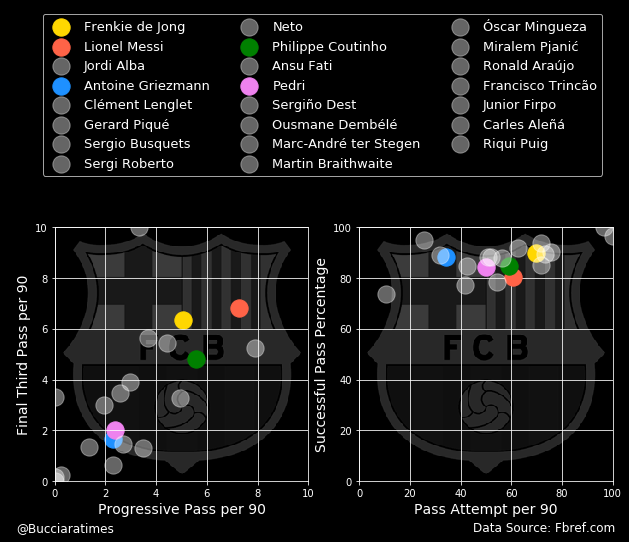

In [400]:

plt.style.use('dark_background')

colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']
plt_size = 300

Xtheme = 'Progcount'
Ytheme = 'Finalthird'
Xtheme2 = 'Attempt'
Ytheme2 = 'Sucpct'

xrange = 10
yrange = 10
xrange2 = 100
yrange2 = 100

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,xrange2, 0,yrange2])

axes[0].grid(True)
axes[1].grid(True)

for i in range(df.shape[0]):   
    if [name for name in df_pass['Player']][i]==pickup_player[1]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[1],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[1])
        
    elif [name for name in df_pass['Player']][i]==pickup_player[3]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[2],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[2])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[4]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[4],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[4])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[0]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[3],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[3])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[5]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[5],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1, 
            s=plt_size, 
            color=colors[5])
    else:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=0.4,
            s=plt_size,
            color=colors[0],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=0.4, 
            s=plt_size, 
            color=colors[0])
            
        axes[1].set_axisbelow(True)

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Progressive Pass per 90', fontsize=14)
axes[0].set_ylabel('Final Third Pass per 90', fontsize=14)
axes[1].set_xlabel('Pass Attempt per 90', fontsize=14)
axes[1].set_ylabel('Successful Pass Percentage', fontsize=14)
# plt.gcf().text(0,-0.05,"@Bucciaratimes")
plt.text(-135,-20, '@Bucciaratimes', color='white',fontsize=12) 
plt.text(45,-20, "Data Source: Fbref.com",fontsize=12)
fig.legend(bbox_to_anchor=(0.05,1),loc=3, fontsize=13, ncol=3)
fig.savefig('/work/output/barcelona/pickup_oam_player_pass1.png',bbox_inches='tight')

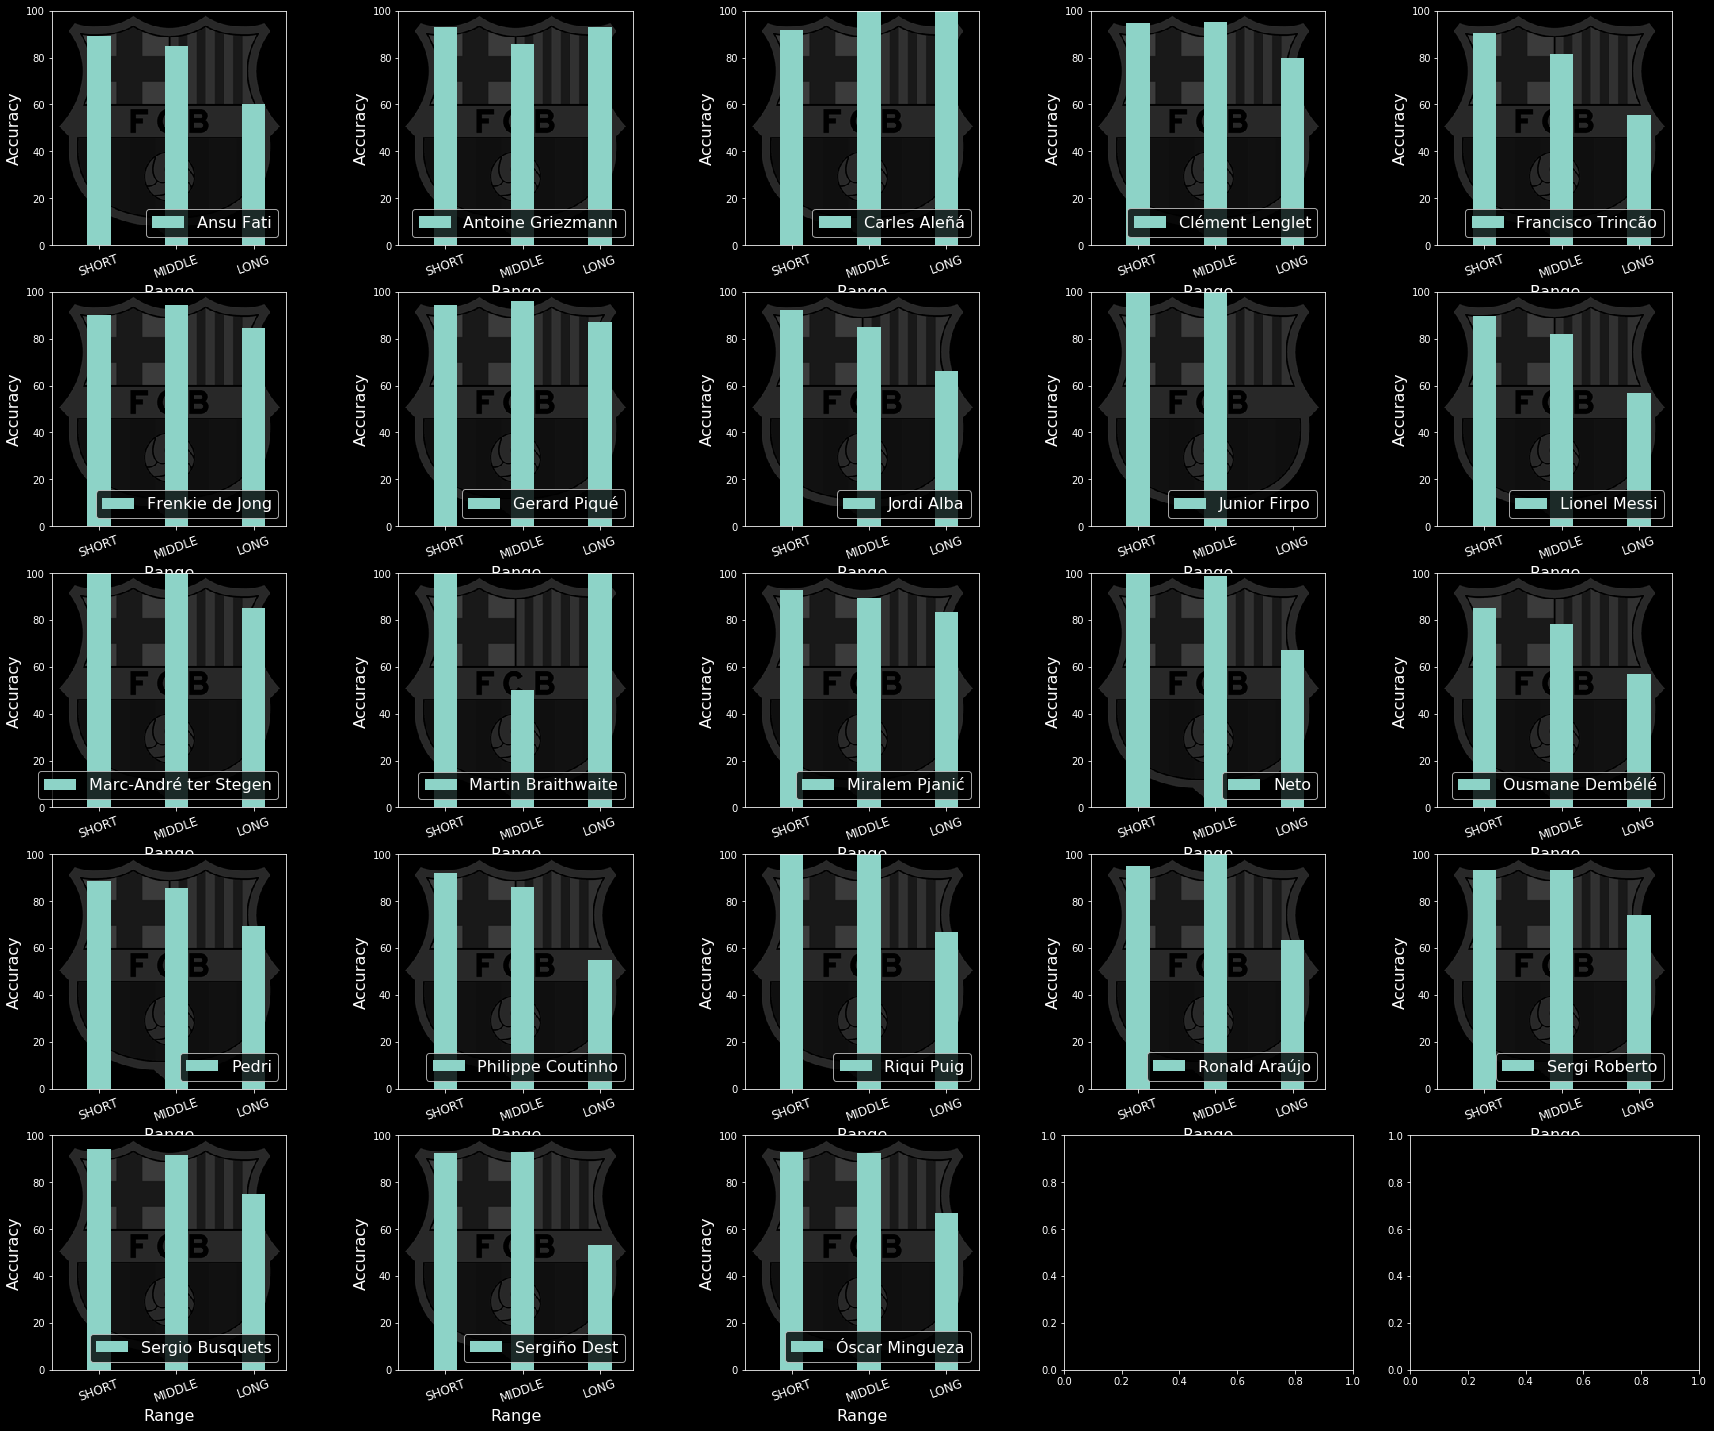

<Figure size 432x288 with 0 Axes>

In [380]:
df_range = df_name[['ShortPct', 'MediPct', 'LongPct']].T

plt.style.use('dark_background')
color = ['dodgerblue','tomato','lime','plum','green','gold','red','navy']

img = Image.open('/work/assets/image/barca.png').convert('L')
logo = img.copy()
logo.putalpha(60) 
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30,25))
row = 0
col = 0
X = range(20,100,33)
for i in range(23):
    axes[row,col].imshow(logo,extent=[0, 100, 0, 100])
    axes[row,col].set_ylim(0,100)
    axes[row,col].set_xlim(0,100)
    axes[row,col].bar(X,df_range.iloc[:,i], align="center", width=10,tick_label=['SHORT','MIDDLE','LONG'],label=df_range.columns.tolist()[i])
    axes[row,col].set_xlabel('Range',fontsize=16)
    axes[row,col].set_ylabel('Accuracy',fontsize=16)
    axes[row,col].legend(loc='lower right',fontsize=16)
    axes[row,col].set_xticklabels(['SHORT','MIDDLE','LONG'],rotation=20, fontsize=12)
    col += 1
    if col == 5:
        col = 0
        row += 1
    elif row == 5:
        break
plt.show()
plt.gcf().text(0.1,0.90,"@Bucciaratimes",fontsize=16)
plt.gcf().text(0.8,0.90,"Data Source: Fbref.com",fontsize=16)

fig.savefig('/work/output/barcelona/range1206.png')

In [381]:
df_name.loc['Riqui Puig','Position'] = 'MF'
df_name.head()

,Position,Minute90,Attempt,Completed,Sucpct,Totaldist,Progdist,LongPass,LongComp,LongPct,...,MediComp,MediPct,ShortPass,ShortComp,ShortPct,Keypass,Finalthird,Penalty,CrossPena,Progcount
Player,,,,,,,,,,,,,,,,,,,,,
Ansu Fati,FW,4.8,205,174,84.9,2150,459,5,3,60.0,...,40,85.1,137,122,89.1,9,3,7,0,11
Antoine Griezmann,FW,6.8,266,235,88.3,3485,640,14,13,92.9,...,78,85.7,148,138,93.2,6,13,6,0,18
Carles Aleñá,MF,0.3,30,29,96.7,576,134,7,7,100.0,...,11,100.0,12,11,91.7,0,2,0,0,5
Clément Lenglet,DF,6.7,482,443,91.9,8584,3289,79,63,79.7,...,211,95.0,172,163,94.8,1,30,2,0,23
Francisco Trincão,"FW,MF",2.1,125,98,78.4,1318,316,9,5,55.6,...,22,81.5,75,68,90.7,2,3,2,0,8


In [382]:
# df_name = df_name[df_name['Position']=='DF']
df_range2 = df_name[['ShortPass', 'MediPass','LongPass']].T
columns = df_range2.columns.values.tolist()
df_range2

Player,Ansu Fati,Antoine Griezmann,Carles Aleñá,Clément Lenglet,Francisco Trincão,Frenkie de Jong,Gerard Piqué,Jordi Alba,Junior Firpo,Lionel Messi,...,Neto,Ousmane Dembélé,Pedri,Philippe Coutinho,Riqui Puig,Ronald Araújo,Sergi Roberto,Sergio Busquets,Sergiño Dest,Óscar Mingueza
ShortPass,137,148,12,172,75,331,163,312,16,278,...,45,86,132,162,1,20,280,237,147,29
MediPass,47,91,11,222,27,257,300,215,13,185,...,85,64,106,108,6,36,202,230,71,39
LongPass,5,14,7,79,9,77,78,59,0,81,...,58,14,26,31,3,19,31,64,15,9


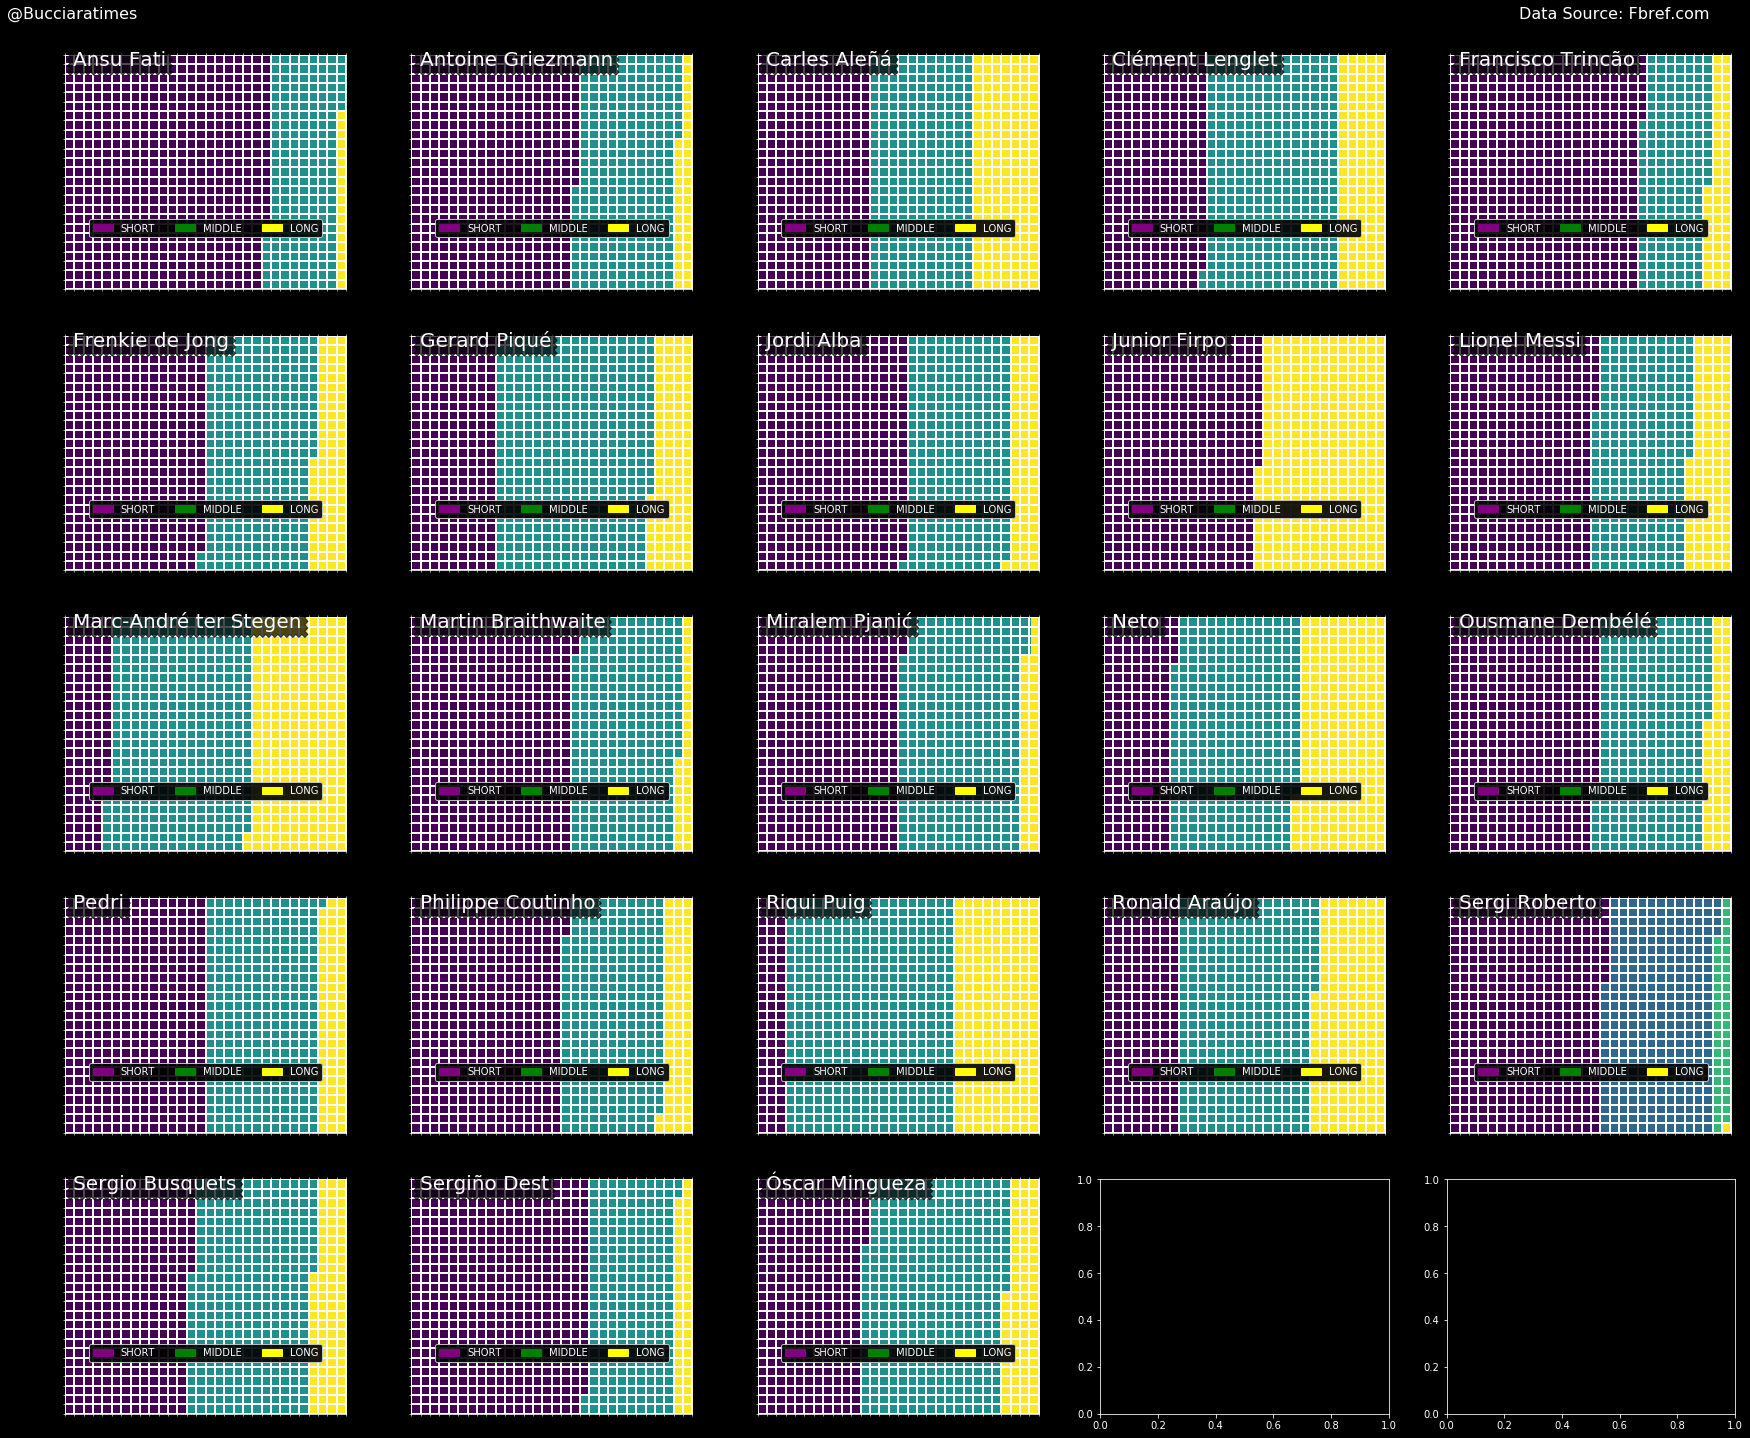

In [383]:

# img = Image.open('/work/assets/image/barca.png').convert('L')
# logo = img.copy()
# logo.putalpha(90) 


fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30,25))
colormap = plt.cm.viridis
colors = ['purple','green','yellow']

width = 30
height = 25
row = 0
col = 0
names = df_range2.columns.tolist()

for name in names:
    total = df_range2[name].sum()
    proportions = [(value / total) for value in df_range2[name]]
    waffle_size = width * height
    each_tile_size = [round(proportion * waffle_size)for proportion in proportions]
    waffle = np.zeros((height, width))
    each_tile_index = 0
    tile_index = 0
    
#     縦方向にループさせたいからcolumns->rowでネスト
    for c in range(width):
        for r in range(height):
            tile_index += 1
#             tileの色の切り替えのコード
            if tile_index > sum(each_tile_size[0:each_tile_index]):
                each_tile_index += 1
            waffle[r,c] = each_tile_index
            
   
    axes[row,col].matshow(waffle, cmap=colormap, alpha=1)
    axes[row,col].set_xticks(np.arange(-0.5, (width), 1), minor=True)
    axes[row,col].set_yticks(np.arange(-0.5, (height), 1), minor=True)
    axes[row,col].grid(which='minor', color='w', linestyle='-', linewidth=2)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    
    label_num = df_range2[name]
    label_name = ['SHORT', 'MIDDLE', 'LONG']
    value_sign = ''
    values_cumsum = np.cumsum(label_num)
    values = values_cumsum[len(values_cumsum) - 1]
    legend_handles = []
    for i, label in enumerate(label_name):
        if value_sign == '%':
            label_str = label + '(' + str(label_num[i]) + value_sign + ')'
        else:
            label_str = label
#             label_str = label + '(' + value_sign + str(label_num[i]) + ')'
        color_val = colormap(float(values_cumsum[i]) / values)
        legend_handles.append(mpatches.Patch(color=colors[i], label=label_str))
    
    axes[row,col].legend(
        handles=legend_handles,
        loc = 'lower center',
        ncol=len(label_name),
        bbox_to_anchor=(0.5, 0.2), # positioning of legend
        framealpha=0.9
    )
    boxdic = {
    'color':'black',
    "boxstyle": "sawtooth",
    "linewidth" : 1,
    'alpha':0.7
    }
    axes[row,col].text(0.4, 0.6, name, size=20, bbox=boxdic)
    
    
    col += 1
    if col == 5:
        col = 0
        row += 1
    elif row == 5:
        break
        
    


plt.gcf().text(0.1,0.90,"@Bucciaratimes",fontsize=16)
plt.gcf().text(0.8,0.90,"Data Source: Fbref.com",fontsize=16)
plt.style.use('dark_background')
fig.savefig('/work/output/barcelona/range_waffle.png')

    


In [384]:
waffle = np.zeros((height,width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1     
        waffle[row,col] = category_index
#         print(waffle[row,col])

fig = plt.figure()
colormap = plt.cm.inferno
plt.matshow(waffle,cmap=colormap, label='ansu fati')

# get current axes
ax = plt.gca()

# 目盛りの設定（-0.5指定をすることで間隔を調整）
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# 罫線の設定
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# 空のリストで目盛りをなくす
plt.xticks([])
plt.yticks([])

# legend settings
values = [1,2,3]
categories = ['america', 'japan', 'argen']
value_sign = ''
values_cumsum = np.cumsum(values)
total_values = values_cumsum[len(values_cumsum) - 1]
legend_handles = []
for i, category in enumerate(categories):
    if value_sign == '%':
        label_str = category + ' (' + str(values[i]) + value_sign + ')' 
    else:
        label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0., 0.2, 0.95, 0.1)) #positioning legends
# colorbarの表示
plt.colorbar()

NameError: name 'tiles_per_category' is not defined

In [ ]:
print(plt.colormaps())

In [ ]:
print(each_tile_size)

In [ ]:
df_pass[Ytheme][1] / df_pass['Minute90'][1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in true_divide


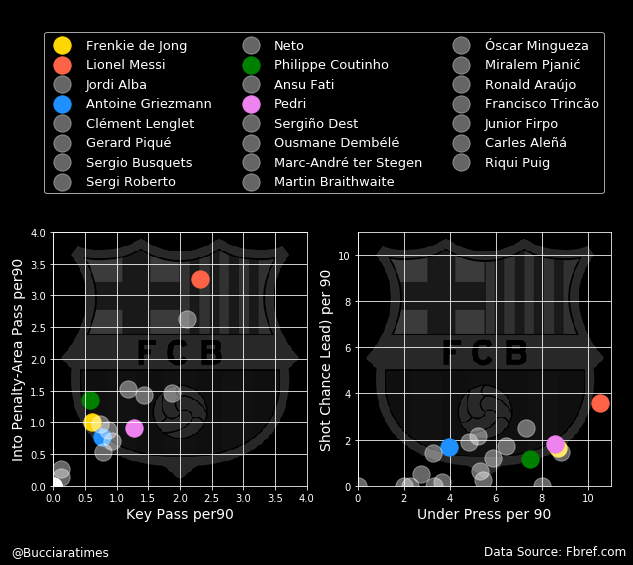

In [399]:
plt.style.use('dark_background')

colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']
plt_size = 300

Xtheme = 'Keypass'
Ytheme = 'Penalty'
Xtheme2 = 'press'
Ytheme2 = 's_passlive'

xrange = 4
yrange = 4
xrange2 = 11
yrange2 = 11


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,11, 0,11])

axes[0].grid(True)
axes[1].grid(True)

for i in range(df.shape[0]):   
    if [name for name in df_pass['Player']][i]==pickup_player[1]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[1],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[1])
        
    elif [name for name in df_pass['Player']][i]==pickup_player[3]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[2],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[2])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[4]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[4],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[4])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[0]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[3],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[3])
            
    elif [name for name in df_pass['Player']][i]==pickup_player[5]:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] /df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[5],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=1, 
            s=plt_size, 
            color=colors[5])
    else:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=0.4,
            s=plt_size,
            color=colors[0],
            label=[name for name in df_pass['Player']][i])
            
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i] / df_pass['Minute90'][i],
            alpha=0.4, 
            s=plt_size, 
            color=colors[0])
            
        axes[1].set_axisbelow(True)

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Key Pass per90', fontsize=14)
axes[0].set_ylabel('Into Penalty-Area Pass per90', fontsize=14)
axes[1].set_xlabel('Under Press per 90', fontsize=14)
axes[1].set_ylabel('Shot Chance Lead) per 90', fontsize=14)
# plt.gcf().text(0,-0.05,"@Bucciaratimes")
plt.text(-15,-3,'@Bucciaratimes', color='white',fontsize=12) 
plt.text(5.5,-3, "Data Source: Fbref.com",fontsize=12)
fig.legend(bbox_to_anchor=(0.45,1.5),loc=9, fontsize=13, ncol=3)
fig.savefig('/work/output/barcelona/pickup_oam_player_pass2.png',bbox_inches='tight')